# Mobile Price Classification

Bob, the founder of a new mobile company, is aiming to compete with established giants like Apple and Samsung in the mobile phone market. However, to make informed decisions about pricing, he needs to understand the relationship between various features of a mobile phone (such as RAM, internal memory, etc.) and its selling price. This is where machine learning comes in.

In this notebook, we will assist Bob in solving his problem by building a machine learning model that can classify mobile phones into different price ranges based on their features. Instead of predicting the actual price, we'll focus on categorizing the phones into price tiers, indicating how high the price is relative to others.

You can find the Kaggle problem: https://www.kaggle.com/datasets/iabhishekofficial/mobile-price-classification

What we're going to cover:

1. Getting the data ready
2. Choose the right estimator/algorithm for our problems
3. Fit the model/algorithm and use it to make predictions on our data
4. Evaluating a model
5. Improve a model
6. Save and load a trained model
7. Conclusion
8. Predict test data and save predictions

## 1. Getting the data ready

In [74]:
import pandas as pd
import numpy as np

mobile_price_data = pd.read_csv("./data/train.csv")
mobile_price_data.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [75]:
# Total number of rows
len(mobile_price_data)

2000

In [76]:
mobile_price_data.dtypes

battery_power      int64
blue               int64
clock_speed      float64
dual_sim           int64
fc                 int64
four_g             int64
int_memory         int64
m_dep            float64
mobile_wt          int64
n_cores            int64
pc                 int64
px_height          int64
px_width           int64
ram                int64
sc_h               int64
sc_w               int64
talk_time          int64
three_g            int64
touch_screen       int64
wifi               int64
price_range        int64
dtype: object

### 1a. Drop N/A columns

In [77]:
# Identify Column With N/A values
mobile_price_data.isna().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

### 1b. Shuffle Data

In [78]:
mobile_price_data = mobile_price_data.sample(frac=1, random_state=42)

### 1c. Check for Duplicate

In [79]:
duplicates = mobile_price_data[mobile_price_data.duplicated()]
duplicates

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range


### 1d. Split Data into X/y

In [80]:
X = mobile_price_data.drop("price_range", axis=1)
y = mobile_price_data["price_range"]

## 2. choosing the right estimator/algorithm for your problem
Using:https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html as a roadmap to picking a model, Our options are:
- Linear SVC
- KNeighbors Classifier
- Ensemble Classifier
- SVM


## 3. Fit the model/algorithm and use it to make predictions on our data

##### 3a. In this step, we split the data into training and testing sets, allocating 80% for training and 20% for testing.

In [81]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

#### 3b. Linear SVC

In [82]:
from sklearn.svm import LinearSVC

#set up random seed
np.random.seed(42)
linear_svc_clf = LinearSVC(max_iter=10000, dual='auto')
linear_svc_clf.fit(X_train, y_train)

# Evaluate LinearSVC
linear_svc_clf.score(X_test, y_test)

0.8225

In [83]:
np.random.seed(42)
highest_score = 0
optimal_max_iter = 0
for i in range(10, 100, 1):
    print(f"Trying LinearSVC with {i} max_iter")
    linear_svc_clf = LinearSVC(max_iter=i, dual='auto')
    linear_svc_clf.fit(X_train, y_train)
    score = linear_svc_clf.score(X_test, y_test)
    print(f" Model accuracy on test set: {score*100:.2f}%")
    
    if score > highest_score:
        highest_score = score
        optimal_max_iter = i
    
    print("")
    
print("highest score is:", highest_score, " at optimal_max_iter:", optimal_max_iter)

Trying LinearSVC with 10 max_iter
 Model accuracy on test set: 62.50%

Trying LinearSVC with 11 max_iter
 Model accuracy on test set: 63.25%

Trying LinearSVC with 12 max_iter
 Model accuracy on test set: 63.25%

Trying LinearSVC with 13 max_iter
 Model accuracy on test set: 64.75%

Trying LinearSVC with 14 max_iter
 Model accuracy on test set: 64.25%

Trying LinearSVC with 15 max_iter
 Model accuracy on test set: 65.75%

Trying LinearSVC with 16 max_iter
 Model accuracy on test set: 65.50%

Trying LinearSVC with 17 max_iter
 Model accuracy on test set: 66.50%

Trying LinearSVC with 18 max_iter
 Model accuracy on test set: 66.75%

Trying LinearSVC with 19 max_iter
 Model accuracy on test set: 67.00%

Trying LinearSVC with 20 max_iter
 Model accuracy on test set: 67.50%

Trying LinearSVC with 21 max_iter
 Model accuracy on test set: 68.25%

Trying LinearSVC with 22 max_iter
 Model accuracy on test set: 66.75%

Trying LinearSVC with 23 max_iter
 Model accuracy on test set: 68.50%

Trying

In [84]:
#set up random seed
import warnings
warnings.filterwarnings('ignore')
np.random.seed(42)
final_linear_svc_clf = LinearSVC(max_iter=60, dual='auto')
final_linear_svc_clf.fit(X_train, y_train)

# Evaluate LinearSVC
final_linear_svc_clf.score(X_test, y_test)

0.8225

#### 3b. KNeighbors Classifier

In [85]:
from sklearn.neighbors import KNeighborsClassifier

knn_classifier = KNeighborsClassifier(n_neighbors=100)
knn_classifier.fit(X_train.values, y_train.values)
knn_classifier.score(X_test.values, y_test.values)


0.92

In [86]:
np.random.seed(42)
highest_score = 0
most_optimal_n_neighbors = 0
for i in range(1, 100, 1):
    print(f"Trying KNeighborsClassifier with {i} n_neighbors")
    knn_classifier = KNeighborsClassifier(n_neighbors=i)
    knn_classifier.fit(X_train.values, y_train.values)
    score = knn_classifier.score(X_test.values, y_test.values)
    print(f" Model accuracy on test set: {score*100:.2f}%")
    if score > highest_score:
        highest_score = score
        most_optimal_n_neighbors = i

    
    print("")
print("highest score is:", highest_score, " at n_neighbors:", most_optimal_n_neighbors)

Trying KNeighborsClassifier with 1 n_neighbors
 Model accuracy on test set: 89.75%

Trying KNeighborsClassifier with 2 n_neighbors
 Model accuracy on test set: 89.75%

Trying KNeighborsClassifier with 3 n_neighbors
 Model accuracy on test set: 92.75%

Trying KNeighborsClassifier with 4 n_neighbors
 Model accuracy on test set: 90.00%

Trying KNeighborsClassifier with 5 n_neighbors
 Model accuracy on test set: 93.50%

Trying KNeighborsClassifier with 6 n_neighbors
 Model accuracy on test set: 92.00%

Trying KNeighborsClassifier with 7 n_neighbors
 Model accuracy on test set: 93.00%

Trying KNeighborsClassifier with 8 n_neighbors
 Model accuracy on test set: 93.25%

Trying KNeighborsClassifier with 9 n_neighbors
 Model accuracy on test set: 93.00%

Trying KNeighborsClassifier with 10 n_neighbors
 Model accuracy on test set: 93.75%

Trying KNeighborsClassifier with 11 n_neighbors
 Model accuracy on test set: 93.25%

Trying KNeighborsClassifier with 12 n_neighbors
 Model accuracy on test se

In [87]:
np.random.seed(42)
final_knn_classifier = KNeighborsClassifier(n_neighbors=11)
final_knn_classifier.fit(X_train.values, y_train.values)
final_knn_classifier.score(X_test.values, y_test.values)

0.9325

#### 3c. Ensemble Classifier

In [88]:
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

random_forest_classifier_model =  RandomForestClassifier(n_estimators=100)
random_forest_classifier_model.fit(X_train, y_train)

# Check score of model
random_forest_classifier_model.score(X_test, y_test)

0.89

In [89]:
np.random.seed(42)
highest_score = 0
optimal_n_estimators = 0
for i in range(1, 100, 1):
    print(f"Trying RandomForestClassifier with {i} n_estimators")
    random_forest_classifier_model = RandomForestClassifier(n_estimators=i)
    random_forest_classifier_model.fit(X_train, y_train)
    score = random_forest_classifier_model.score(X_test, y_test)
    print(f" Model accuracy on test set: {score*100:.2f}%")
    if score > highest_score:
        highest_score = score
        optimal_n_estimators=i
    
    print("")
print("highest score is:", highest_score, "at n_estimators:", optimal_n_estimators)

Trying RandomForestClassifier with 1 n_estimators
 Model accuracy on test set: 61.00%

Trying RandomForestClassifier with 2 n_estimators
 Model accuracy on test set: 57.00%

Trying RandomForestClassifier with 3 n_estimators
 Model accuracy on test set: 59.00%

Trying RandomForestClassifier with 4 n_estimators
 Model accuracy on test set: 68.75%

Trying RandomForestClassifier with 5 n_estimators
 Model accuracy on test set: 72.25%

Trying RandomForestClassifier with 6 n_estimators
 Model accuracy on test set: 76.00%

Trying RandomForestClassifier with 7 n_estimators
 Model accuracy on test set: 79.50%

Trying RandomForestClassifier with 8 n_estimators
 Model accuracy on test set: 73.50%

Trying RandomForestClassifier with 9 n_estimators
 Model accuracy on test set: 82.00%

Trying RandomForestClassifier with 10 n_estimators
 Model accuracy on test set: 79.00%

Trying RandomForestClassifier with 11 n_estimators
 Model accuracy on test set: 84.50%

Trying RandomForestClassifier with 12 n_e

In [90]:
np.random.seed(42)

final_random_forest_classifier_model =  RandomForestClassifier(n_estimators=98)
final_random_forest_classifier_model.fit(X_train, y_train)
final_random_forest_classifier_model.score(X_test, y_test)

0.8875

In [91]:
from sklearn import svm
svc = svm.SVC(kernel='linear')
svc.fit(X_train, y_train)
svc.score(X_test, y_test)

0.9775

#### Model Ranking Based on Score

1. `svc`: 0.9825
2. `final_knn_classifier`: 0.93
3. `final_random_forest_classifier_model`: 0.88
4. `final_linear_svc_clf`: 0.7875


## 4. Evaluating a model


#### 4.1 Make predictions

In [92]:
y_preds_final_random_forest_classifier_model =final_random_forest_classifier_model.predict(X_test)
np.mean(y_preds_final_random_forest_classifier_model == y_test)

0.8875

In [93]:
y_preds_final_linear_svc_clf = final_linear_svc_clf.predict(X_test)
np.mean(y_preds_final_linear_svc_clf == y_test)

0.8225

In [94]:
y_preds_final_knn_classifier = final_knn_classifier.predict(X_test.values)
np.mean(y_preds_final_knn_classifier == y_test)

0.9325

In [95]:
y_preds_svc = svc.predict(X_test)
np.mean(y_preds_svc == y_test)

0.9775

#### Model Ranking Based on Prediction

1. `svc`: 0.9825
2. `final_knn_classifier`: 0.93
3. `final_random_forest_classifier_model`: 0.88
4. `final_linear_svc_clf`: 0.7875


#### 4.2 Make cross evaluation

In [96]:
from sklearn.model_selection import cross_val_score
warnings.filterwarnings('ignore')
np.random.seed(42)
cross_value_score_for_final_random_forest_classifier_model = cross_val_score(final_random_forest_classifier_model, X, y, scoring='accuracy')
np.mean(cross_value_score_for_final_random_forest_classifier_model)

0.8755

In [97]:
warnings.filterwarnings('ignore')
np.random.seed(42)

cross_value_score_for_final_linear_svc_clf = cross_val_score(final_linear_svc_clf, X, y, scoring='accuracy')
np.mean(cross_value_score_for_final_linear_svc_clf)

0.804

In [98]:
warnings.filterwarnings('ignore')
np.random.seed(42)

cross_value_score_for_final_knn_classifier = cross_val_score(final_knn_classifier, X.values, y.values, scoring='accuracy')
np.mean(cross_value_score_for_final_knn_classifier)

0.9385

In [99]:
warnings.filterwarnings('ignore')
np.random.seed(42)

cross_value_score_for_svc = cross_val_score(svc, X, y, scoring='accuracy')
np.mean(cross_value_score_for_svc)

0.9710000000000001

#### Model Ranking Based on Score
1. `svc`: 0.9710000000000001
2. `final_knn_classifier`: 0.9385
3. `final_random_forest_classifier_model`: 0.8755
4. `final_linear_svc_clf`: 0.804


#### 4.3 Confusion Matrix

**random_forest_classifier_model**

In [100]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_preds_final_random_forest_classifier_model)
pd.crosstab(y_test, y_preds_final_random_forest_classifier_model, rownames=["Actual Label"],
            colnames=["predicted Labels"]
           )

predicted Labels,0,1,2,3
Actual Label,,,,
0,107,4,0,0
1,7,86,5,0
2,0,14,73,9
3,0,0,6,89


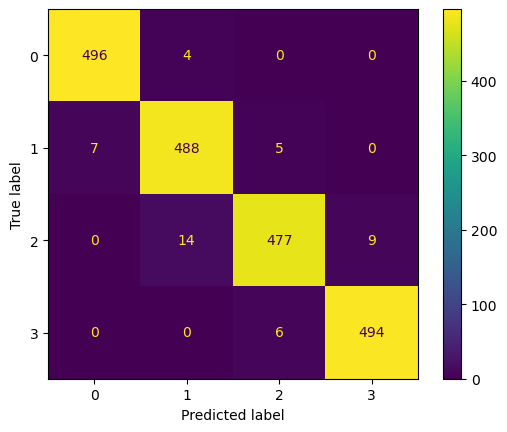

In [101]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(estimator=final_random_forest_classifier_model, X=X, y=y)

**linear_svc_clf**

In [102]:
confusion_matrix(y_test, y_preds_final_linear_svc_clf)
pd.crosstab(y_test, y_preds_final_linear_svc_clf, rownames=["Actual Label"],
            colnames=["predicted Labels"]
           )

predicted Labels,0,1,2,3
Actual Label,,,,
0,110,1,0,0
1,7,74,17,0
2,0,24,51,21
3,0,0,1,94


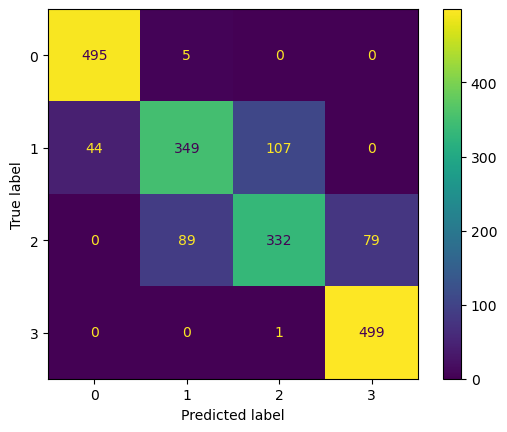

In [103]:
ConfusionMatrixDisplay.from_estimator(estimator=final_linear_svc_clf, X=X, y=y)

**knn_classifier**

In [104]:
confusion_matrix(y_test, y_preds_final_knn_classifier)
pd.crosstab(y_test, y_preds_final_knn_classifier, rownames=["Actual Label"],
            colnames=["predicted Labels"]
           )

predicted Labels,0,1,2,3
Actual Label,,,,
0,108,3,0,0
1,4,92,2,0
2,0,7,84,5
3,0,0,6,89


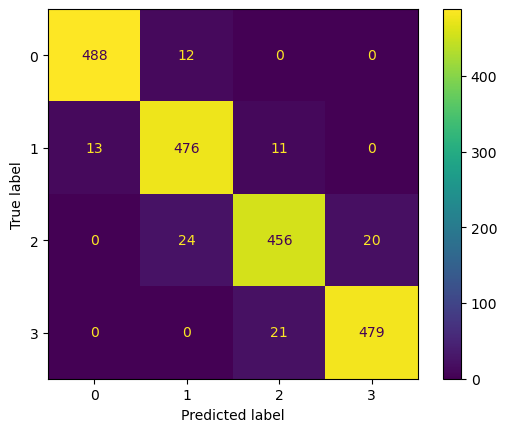

In [105]:
ConfusionMatrixDisplay.from_estimator(estimator=final_knn_classifier, X=X.values, y=y.values)

**svc**

In [106]:
confusion_matrix(y_test, y_preds_svc)
pd.crosstab(y_test, y_preds_svc, rownames=["Actual Label"],
            colnames=["predicted Labels"]
           )

predicted Labels,0,1,2,3
Actual Label,,,,
0,111,0,0,0
1,1,95,2,0
2,0,1,93,2
3,0,0,3,92


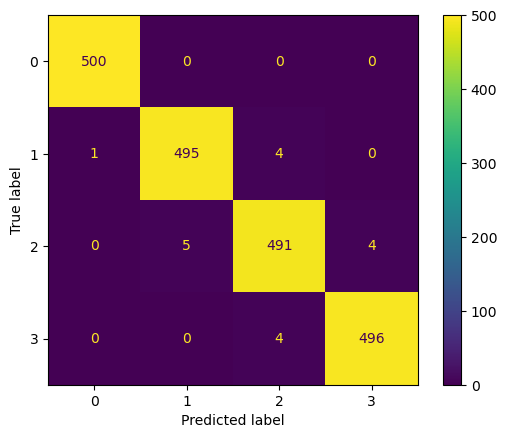

In [107]:
ConfusionMatrixDisplay.from_estimator(estimator=svc, X=X, y=y)

#### Model Ranking Based on Confusion Matrix

1. `svc`
2. `final_knn_classifier`
2. `final_random_forest_classifier_model`
3. `final_linear_svc_clf`

#### 4.4 Classification Report


In [108]:
from sklearn.metrics import classification_report

**linear_svc_clf**

In [109]:
print(classification_report(y_test, y_preds_final_linear_svc_clf))

              precision    recall  f1-score   support

           0       0.94      0.99      0.96       111
           1       0.75      0.76      0.75        98
           2       0.74      0.53      0.62        96
           3       0.82      0.99      0.90        95

    accuracy                           0.82       400
   macro avg       0.81      0.82      0.81       400
weighted avg       0.82      0.82      0.81       400



**knn_classifier**

In [110]:
print(classification_report(y_test, y_preds_final_knn_classifier))

              precision    recall  f1-score   support

           0       0.96      0.97      0.97       111
           1       0.90      0.94      0.92        98
           2       0.91      0.88      0.89        96
           3       0.95      0.94      0.94        95

    accuracy                           0.93       400
   macro avg       0.93      0.93      0.93       400
weighted avg       0.93      0.93      0.93       400



**random_forest_classifier_model**

In [111]:
print(classification_report(y_test, y_preds_final_random_forest_classifier_model))

              precision    recall  f1-score   support

           0       0.94      0.96      0.95       111
           1       0.83      0.88      0.85        98
           2       0.87      0.76      0.81        96
           3       0.91      0.94      0.92        95

    accuracy                           0.89       400
   macro avg       0.89      0.88      0.88       400
weighted avg       0.89      0.89      0.89       400



**svc_model**

In [112]:
print(classification_report(y_test, y_preds_svc))

              precision    recall  f1-score   support

           0       0.99      1.00      1.00       111
           1       0.99      0.97      0.98        98
           2       0.95      0.97      0.96        96
           3       0.98      0.97      0.97        95

    accuracy                           0.98       400
   macro avg       0.98      0.98      0.98       400
weighted avg       0.98      0.98      0.98       400



## 6. Save and load a trained model

**random_forest_classifier_model**

In [113]:
import pickle
pickle.dump(final_random_forest_classifier_model, open("./models/final_random_forest_classifier_model.pkl", "wb"))

**linear_svc_clf**

In [114]:
pickle.dump(final_linear_svc_clf, open("./models/final_linear_svc_clf_model.pkl", "wb"))

**knn_classifier**

In [115]:
pickle.dump(final_knn_classifier, open("./models/final_knn_classifier_model.pkl", "wb"))

**svc**

In [116]:
pickle.dump(svc, open("./models/final_svc_model.pkl", "wb"))

# 7. Conclusion

In the evaluation of our models, the SVC classifier demonstrated the highest performance, followed by the k-nearest neighbors (KNN) classifier, random forest classifier and linear support vector classifier (LinearSVC).

In [117]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, recall_score, precision_score, f1_score
def evaluate_preds(y_true, y_preds):
    """
    Performs evaluation comparison on 
    y_true labels vs y_preds labels on classification
    """
    accuracy = accuracy_score(y_true, y_preds)
    precision = precision_score(y_true, y_preds, average='micro')
    recall = recall_score(y_true, y_preds, average='micro')
    f1 = f1_score(y_true, y_preds, average='micro')
    metric_dict = {
        "accuracy": round(accuracy, 2),
        "precision": round(precision, 2),
        "recall": round(recall, 2),
        "f1": round(f1, 2)
    }
    
    print(f"Result: {metric_dict}")
    
    return metric_dict

In [118]:
svc_metrics = evaluate_preds(y_test, y_preds_svc)
final_knn_classifier_metrics = evaluate_preds(y_test, y_preds_final_knn_classifier)
final_random_forest_classifier_model_metrics = evaluate_preds(y_test, y_preds_final_random_forest_classifier_model)
final_linear_svc_clf_metrics = evaluate_preds(y_test, y_preds_final_linear_svc_clf)


Result: {'accuracy': 0.98, 'precision': 0.98, 'recall': 0.98, 'f1': 0.98}
Result: {'accuracy': 0.93, 'precision': 0.93, 'recall': 0.93, 'f1': 0.93}
Result: {'accuracy': 0.89, 'precision': 0.89, 'recall': 0.89, 'f1': 0.89}
Result: {'accuracy': 0.82, 'precision': 0.82, 'recall': 0.82, 'f1': 0.82}


<Axes: >

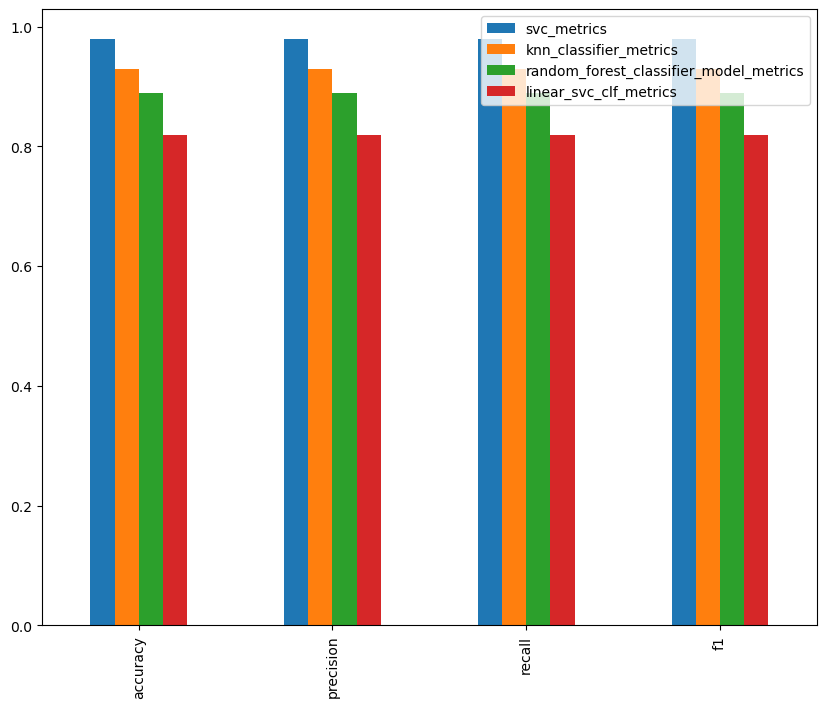

In [119]:
compare_metrics = pd.DataFrame({
    "svc_metrics": svc_metrics,
    "knn_classifier_metrics": final_knn_classifier_metrics,
    "random_forest_classifier_model_metrics": final_random_forest_classifier_model_metrics,
    "linear_svc_clf_metrics": final_linear_svc_clf_metrics
})
compare_metrics.plot.bar(figsize=(10,8))

# 8. Predict test data and save predictions

In [120]:
mobile_price_test_data = pd.read_csv("./data/test.csv")
mobile_price_test_data.head()

,id,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,...,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,1,1043,1,1.8,1,14,0,5,0.1,193,...,16,226,1412,3476,12,7,2,0,1,0
1,2,841,1,0.5,1,4,1,61,0.8,191,...,12,746,857,3895,6,0,7,1,0,0
2,3,1807,1,2.8,0,1,0,27,0.9,186,...,4,1270,1366,2396,17,10,10,0,1,1
3,4,1546,0,0.5,1,18,1,25,0.5,96,...,20,295,1752,3893,10,0,7,1,1,0
4,5,1434,0,1.4,0,11,1,49,0.5,108,...,18,749,810,1773,15,8,7,1,0,1


In [121]:
len(mobile_price_test_data)

1000

In [122]:
mobile_price_test_data.dtypes

id                 int64
battery_power      int64
blue               int64
clock_speed      float64
dual_sim           int64
fc                 int64
four_g             int64
int_memory         int64
m_dep            float64
mobile_wt          int64
n_cores            int64
pc                 int64
px_height          int64
px_width           int64
ram                int64
sc_h               int64
sc_w               int64
talk_time          int64
three_g            int64
touch_screen       int64
wifi               int64
dtype: object

In [123]:
mobile_price_test_data.isna().sum()

id               0
battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
dtype: int64

In [124]:
duplicates = mobile_price_data[mobile_price_data.duplicated()]
duplicates

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range


In [125]:
loaded_final_svc_model = pickle.load(open("./models/final_svc_model.pkl", "rb"))
loaded_final_svc_model.score(X_test.values, y_test.values)

0.9775

In [126]:
import copy
mobile_price_test_data_X = mobile_price_test_data.drop("id", axis=1)
mobile_price_test_data_prediction = copy.deepcopy(mobile_price_test_data_X)
mobile_price_test_data_prediction['price_range'] = loaded_final_svc_model.predict(mobile_price_test_data_X.values)
mobile_price_test_data_prediction.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,1043,1,1.8,1,14,0,5,0.1,193,3,...,226,1412,3476,12,7,2,0,1,0,3
1,841,1,0.5,1,4,1,61,0.8,191,5,...,746,857,3895,6,0,7,1,0,0,3
2,1807,1,2.8,0,1,0,27,0.9,186,3,...,1270,1366,2396,17,10,10,0,1,1,2
3,1546,0,0.5,1,18,1,25,0.5,96,8,...,295,1752,3893,10,0,7,1,1,0,3
4,1434,0,1.4,0,11,1,49,0.5,108,6,...,749,810,1773,15,8,7,1,0,1,1


In [127]:
mobile_price_test_data_prediction.tail()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
995,1700,1,1.9,0,0,1,54,0.5,170,7,...,644,913,2121,14,8,15,1,1,0,2
996,609,0,1.8,1,0,0,13,0.9,186,4,...,1152,1632,1933,8,1,19,0,1,1,1
997,1185,0,1.4,0,1,1,8,0.5,80,1,...,477,825,1223,5,0,14,1,0,0,0
998,1533,1,0.5,1,0,0,50,0.4,171,2,...,38,832,2509,15,11,6,0,1,0,2
999,1270,1,0.5,0,4,1,35,0.1,140,6,...,457,608,2828,9,2,3,1,0,1,2


In [128]:
len(mobile_price_test_data_prediction)


1000

In [129]:

mobile_price_test_data_prediction.to_csv('./data/mobile_price_test_data_prediction.csv', index=False)
